# <center>Отток клиентов</center>

## <center>Введение</center>

Целью работы является создание модели, прогнозирующей уход клиентов, со значением F1 0.59+. Датасет содержит: индекс строки `RowNumber`, идентификатор клиента `CustomerId`, фамилию клиента `Surname`, кредитный рейтинг `CreditScore`, страну проживания `Geography`, пол клиента `Gender`, возвраст клиента `Age`; количество лет, в которые клиент является, собственно, клиентом банка `Tenure`, баланс на счёте `Balance`, количество используемых продуктов банка `NumOfProducts`, наличие или отсутствие кредитной карты `HasCrCard`, активность `IsActiveMember` и предполагаемая зарплата `EstimatedSalary`.
<br>Факт ухода клиента, являющийся **целевым признаком** - `Exited`.

## <center>План проекта</center>

**Импорт библиотек**
<br>**Предобработка данных**
+ Разделение на выборки и стандартизация

**Dummy-модель**

**Обучение с учётом дисбаланса классов**
+ Постановка задачи и выбор методов
+ Логистическая регрессия
+ Дерево решений
+ Случайный лес

**Проверка на тестовой выборке**

**Важность факторов**

## <center>Импорт библиотек</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

## <center>Предобработка данных</center>

Cчитаем данные и посмотрим, с чем мы имеем дело:

In [2]:
data = pd.read_csv('Churn.csv')

display(data.head(20))
print(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Первые три колонки - `RowNumber`, `CustomerId` и `Surname` - на этом празднике жизни вообще лишние: `RowNumber` просто повторяет индексы, а `CustomerId` и `Surname` не являются содержательными с точки зрения машинного обучения (id и фамилия вряд ли влияют на уход из банка, это служебная информация, которая здесь не нужна). Уберём их:

In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


Отлично. Разберёмся с пропусками в `Tenure`: заполним их средним и переведём столбец в целочисленный тип:

In [4]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean()).astype('int64')

display(data.head(10))
print(data.info())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


Остальное вроде в порядке - осталось превратить строки в числа с помощью прямого кодирования и заодно запомнить, какие данные мы будет стандартизировать (на данном этапе, пока датасет не разросся, сделать это проще):

In [5]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

data_ohe = pd.get_dummies(data, drop_first=True)
display(data_ohe.head())
print(data_ohe.info())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB
None


Замечательно! Напоследок сразу на старте подсмотрим, с каким дисбалансом мы имеем дело:

In [6]:
print(data_ohe['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


Дисбаланс заметный, но 20% - это всё же не 2%. Запомним, что увидели, и перейдём к разделению на выборки и стандартизации.

### <center>Разделение на выборки и стандартизация</center>

Сначала разделим данные на три выборки: тренировочную, тестовую и валидационную - в пропорции 3:1:1. Начнём с отделения тестовой:

In [7]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

features_temp, features_test, target_temp, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

Теперь отделим валидационную и проверим количества:

In [8]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_temp, target_temp, test_size=0.25, random_state=42)

#проверка количества
print(f'Обучающая: {len(features_train)}, {len(target_train)}')
print(f'Валидационная: {len(features_valid)}, {len(target_valid)}')
print(f'Тестовая: {len(features_test)}, {len(target_test)}')

Обучающая: 6000, 6000
Валидационная: 2000, 2000
Тестовая: 2000, 2000


Красота! А теперь всё стандартизируем:

In [9]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 
display(features_train.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8588,0.626553,-0.948125,0.775865,0.026803,-0.919788,1,0,0.389943,0,1,0
3178,-1.143262,0.006684,-0.315963,0.538874,0.806433,1,1,-1.026089,0,0,0
5200,-1.455583,0.293126,1.503749,0.283178,0.806433,1,0,-1.486725,1,0,1
8889,-0.747657,0.006684,1.503749,0.833254,-0.919788,1,0,-0.246001,0,0,0
5789,0.387107,1.534377,-1.407790,0.000856,-0.919788,1,0,-1.006993,1,0,0


Вроде всё хорошо - переходим к обучению без учёта дисбаланса классов.

## <center>Dummy-модель</center>

Рассмотрим модель, обладающую максимальной полнотой:

In [10]:
model_dummy = DummyClassifier(strategy='constant', constant=1, random_state=42)
model_dummy.fit(features_train, target_train)
predictions = model_dummy.predict(features_valid)

accuracy = accuracy_score(target_valid, predictions)
recall = recall_score(target_valid, predictions)
precision = precision_score(target_valid, predictions)
f1_sc = f1_score(target_valid, predictions)
print(f'Accuracy случайной модели: {accuracy: .4f}')
print(f'Полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')

Accuracy случайной модели:  0.2065
Полнота -  1.0000, точность -  0.2065, F1-мера -  0.3423


Мы получили точку отсчёта для точности, увидев минимальную, и F1-меры

## <center>Обучение с учётом дисбаланса классов</center>

### <center>Постановка задачи и выбор методов</center>

Отойдём от чисел и вернёмся к контексту - нашей задачей является создание модели, предсказывающей уход клиентов. Какая метрика здесь самая важная? Я бы сказала, что **полнота**: важно максимально охватить единицы, то есть тех, кто уйдёт.

Нам не так страшно дать ложноположительный ответ (сказать, что клиент уйдёт, когда уходить он не собирается), как дать ложноотрицательный - сказать, что клиент не уйдёт, а потом обнаружить, что он ушёл. Так сказать, лучше готовиться к худшему, то есть сделать "пессимистичную" модель с большой полнотой - точностью до определённого предела, в рамках здравого смысла, можно пожертвовать. (В рамках здравого смысла, ведь чисто теоретически здесь можно выдать модель "всё 1", полнота у неё будет 1.0 - но мы так делать не будем, смысла в этом нет).

Итого - **среди моделей с F1-мерой 0.59+ мы будем искать ту, полнота у которой выше**.

Далее - признаться, к техникам upscaling и downscaling я отношусь с опаской. В этих техниках несомненно есть смысл в ситуациях, когда образцов некоего класса действительно мало (1-5%) - а также когда мы знаем, что некий класс, например, имеет свойство увеличиваться к осени из-за сезонности примерно на N. Наша ситуация не попадает ни в какую из категорий - здесь я предпочла бы избежать этих техник и сосредоточиться на **взвешивании классов и изменении порога**. Из этих соображений и будем исходить далее - переходим к моделям.

### <center>Логистическая регрессия</center>

Начнём с логистической регрессии:

In [11]:
model_lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42) 
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_valid)

accuracy = accuracy_score(target_valid, predictions)
recall = recall_score(target_valid, predictions)
precision = precision_score(target_valid, predictions)
f1_sc = f1_score(target_valid, predictions)
print(f'Accuracy - {accuracy: .4f}')
print(f'Полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')

Accuracy -  0.7215
Полнота -  0.7337, точность -  0.4040, F1-мера -  0.5211


Не худший результат - попробуем изменить порог, оставив взвешивание классов:

In [12]:
probabilities = model_lr.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.9, 0.02):
    predicted_valid = probabilities_one > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1_sc = f1_score(target_valid, predicted_valid)

    print(f'Порог = {threshold: .2f}:')
    print(f'полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        
print()
print(f'Лучший результат: порог - {best_threshold}, F1-мера: {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность: {best_precision: .4f}')

Порог =  0.10:
полнота -  0.9976, точность -  0.2090, F1-мера -  0.3456
Порог =  0.12:
полнота -  0.9976, точность -  0.2133, F1-мера -  0.3514
Порог =  0.14:
полнота -  0.9952, точность -  0.2186, F1-мера -  0.3585
Порог =  0.16:
полнота -  0.9879, точность -  0.2226, F1-мера -  0.3633
Порог =  0.18:
полнота -  0.9855, точность -  0.2298, F1-мера -  0.3727
Порог =  0.20:
полнота -  0.9758, точность -  0.2357, F1-мера -  0.3797
Порог =  0.22:
полнота -  0.9734, точность -  0.2435, F1-мера -  0.3895
Порог =  0.24:
полнота -  0.9588, точность -  0.2491, F1-мера -  0.3954
Порог =  0.26:
полнота -  0.9516, точность -  0.2577, F1-мера -  0.4056
Порог =  0.28:
полнота -  0.9370, точность -  0.2653, F1-мера -  0.4135
Порог =  0.30:
полнота -  0.9346, точность -  0.2789, F1-мера -  0.4296
Порог =  0.32:
полнота -  0.9177, точность -  0.2906, F1-мера -  0.4415
Порог =  0.34:
полнота -  0.8935, точность -  0.2988, F1-мера -  0.4478
Порог =  0.36:
полнота -  0.8741, точность -  0.3067, F1-мера - 

F1-меру удалось немного поднять вместе с точностью - но полнота заметно снизилась, так что я не назвала бы этот результат лучшим (симпатичным в разрезе полноты выглядит **порог 0.46-0.48** - но точность маловата, конечно, однако я бы сказала, что она лежит ещё "в рамках здравого смысла" при выборе "пессимистичной" стратегии). Даже при бОльшей F1-мере - которая всё равно не доходит до нужных нам 0.59. 

И посмотрим, что будет, если взвешивание убрать:

In [13]:
model_lr = LogisticRegression(solver='liblinear', random_state=42) 
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_valid)
probabilities = model_lr.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.9, 0.02):
    predicted_valid = probabilities_one > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1_sc = f1_score(target_valid, predicted_valid)

    print(f'Порог = {threshold: .2f}:')
    print(f'полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        
print()
print(f'Лучший результат: порог - {best_threshold}, F1-мера: {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность: {best_precision: .4f}')

Порог =  0.10:
полнота -  0.9274, точность -  0.2763, F1-мера -  0.4258
Порог =  0.12:
полнота -  0.8935, точность -  0.2961, F1-мера -  0.4448
Порог =  0.14:
полнота -  0.8499, точность -  0.3197, F1-мера -  0.4646
Порог =  0.16:
полнота -  0.8208, точность -  0.3445, F1-мера -  0.4853
Порог =  0.18:
полнота -  0.7869, точность -  0.3681, F1-мера -  0.5015
Порог =  0.20:
полнота -  0.7482, точность -  0.3872, F1-мера -  0.5103
Порог =  0.22:
полнота -  0.6973, точность -  0.4132, F1-мера -  0.5189
Порог =  0.24:
полнота -  0.6368, точность -  0.4276, F1-мера -  0.5117
Порог =  0.26:
полнота -  0.6053, точность -  0.4587, F1-мера -  0.5219
Порог =  0.28:
полнота -  0.5448, точность -  0.4678, F1-мера -  0.5034
Порог =  0.30:
полнота -  0.5133, точность -  0.4775, F1-мера -  0.4947
Порог =  0.32:
полнота -  0.4818, точность -  0.4975, F1-мера -  0.4895
Порог =  0.34:
полнота -  0.4552, точность -  0.5151, F1-мера -  0.4833
Порог =  0.36:
полнота -  0.4286, точность -  0.5206, F1-мера - 

Здесь всё совсем грустно.

Посмотрим на ROC-кривую модели со взвешиванием классов:

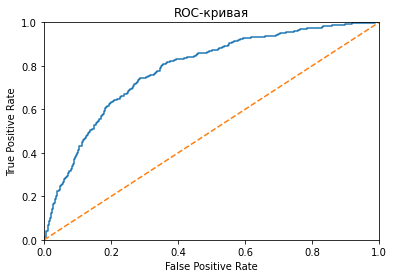

In [14]:
model_lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42) 
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_valid)
probabilities = model_lr.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [15]:
auc_roc = roc_auc_score(target_valid, probabilities_one)
print(auc_roc)

0.7847553747076351


Значение auc-roc вообще достаточно симпатично - но толку от этого, увы, мало. F1-мера слишком мала - отставим логистическую регрессию и перейдём к дереву.

### <center>Дерево решений</center>

Для начала взвесим классы:

In [16]:
best_f1 = 0
best_depth = 0
for i in range(2, 21):
    model_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=i)
    model_tree.fit(features_train, target_train)
    predictions = model_tree.predict(features_valid)
    
    accuracy = accuracy_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    precision = precision_score(target_valid, predictions)
    f1_sc = f1_score(target_valid, predictions)
    print(f'Глубина = {i}:')
    print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_depth = i
        
print()        
print(f'Лучший результат: глубина - {best_depth}, F1-мера: {best_f1: .4f}')

Глубина = 2:
accuracy -  0.7600, полнота -  0.6320, точность -  0.4431, F1-мера -  0.5210
Глубина = 3:
accuracy -  0.7845, полнота -  0.6199, точность -  0.4830, F1-мера -  0.5429
Глубина = 4:
accuracy -  0.6800, полнота -  0.7845, точность -  0.3703, F1-мера -  0.5031
Глубина = 5:
accuracy -  0.8195, полнота -  0.6392, точность -  0.5546, F1-мера -  0.5939
Глубина = 6:
accuracy -  0.7705, полнота -  0.7530, точность -  0.4656, F1-мера -  0.5754
Глубина = 7:
accuracy -  0.7485, полнота -  0.7506, точность -  0.4366, F1-мера -  0.5521
Глубина = 8:
accuracy -  0.7655, полнота -  0.7337, точность -  0.4577, F1-мера -  0.5637
Глубина = 9:
accuracy -  0.7665, полнота -  0.6925, точность -  0.4569, F1-мера -  0.5505
Глубина = 10:
accuracy -  0.7710, полнота -  0.6368, точность -  0.4606, F1-мера -  0.5346
Глубина = 11:
accuracy -  0.7710, полнота -  0.6271, точность -  0.4600, F1-мера -  0.5307
Глубина = 12:
accuracy -  0.7690, полнота -  0.5884, точность -  0.4542, F1-мера -  0.5127
Глубина

Результат не особо радует - попробуем поменять порог, оставив взвешивание классов:

In [17]:
model_best_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)
model_best_tree.fit(features_train, target_train)
predictions = model_best_tree.predict(features_valid)
probabilities = model_best_tree.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.9, 0.02):
    predicted_valid = probabilities_one > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1_sc = f1_score(target_valid, predicted_valid)

    print(f'Порог = {threshold: .2f}:')
    print(f'полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        
print()
print(f'Лучший результат: порог - {best_threshold}, F1-мера: {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность: {best_precision: .4f}')

Порог =  0.10:
полнота -  0.9734, точность -  0.2396, F1-мера -  0.3845
Порог =  0.12:
полнота -  0.9734, точность -  0.2396, F1-мера -  0.3845
Порог =  0.14:
полнота -  0.9661, точность -  0.2608, F1-мера -  0.4107
Порог =  0.16:
полнота -  0.9661, точность -  0.2608, F1-мера -  0.4107
Порог =  0.18:
полнота -  0.9661, точность -  0.2608, F1-мера -  0.4107
Порог =  0.20:
полнота -  0.9661, точность -  0.2608, F1-мера -  0.4107
Порог =  0.22:
полнота -  0.9661, точность -  0.2608, F1-мера -  0.4107
Порог =  0.24:
полнота -  0.8983, точность -  0.3006, F1-мера -  0.4505
Порог =  0.26:
полнота -  0.8983, точность -  0.3006, F1-мера -  0.4505
Порог =  0.28:
полнота -  0.8257, точность -  0.3559, F1-мера -  0.4974
Порог =  0.30:
полнота -  0.8257, точность -  0.3559, F1-мера -  0.4974
Порог =  0.32:
полнота -  0.8257, точность -  0.3559, F1-мера -  0.4974
Порог =  0.34:
полнота -  0.8257, точность -  0.3559, F1-мера -  0.4974
Порог =  0.36:
полнота -  0.8257, точность -  0.3559, F1-мера - 

Здесь ничего лучше не нашлось - и я взяла бы **порог 0.44-0.46** из соображений максимизации полноты в рамках здравого смысла. Результат лучше, чем у линейной регрессии, но в целом F1-мера продолжает печалить. Посмотрим на пороги без взвешивания классов:

In [18]:
model_best_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
model_best_tree.fit(features_train, target_train)
predictions = model_best_tree.predict(features_valid)
probabilities = model_best_tree.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.9, 0.02):
    predicted_valid = probabilities_one > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1_sc = f1_score(target_valid, predicted_valid)

    print(f'Порог = {threshold: .2f}:')
    print(f'полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        
print()
print(f'Лучший результат: порог - {best_threshold}, F1-мера: {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность: {best_precision: .4f}')

Порог =  0.10:
полнота -  0.9056, точность -  0.3056, F1-мера -  0.4569
Порог =  0.12:
полнота -  0.8063, точность -  0.4066, F1-мера -  0.5406
Порог =  0.14:
полнота -  0.8063, точность -  0.4066, F1-мера -  0.5406
Порог =  0.16:
полнота -  0.8063, точность -  0.4066, F1-мера -  0.5406
Порог =  0.18:
полнота -  0.7821, точность -  0.4189, F1-мера -  0.5456
Порог =  0.20:
полнота -  0.7264, точность -  0.4666, F1-мера -  0.5682
Порог =  0.22:
полнота -  0.7264, точность -  0.4666, F1-мера -  0.5682
Порог =  0.24:
полнота -  0.6174, точность -  0.5782, F1-мера -  0.5972
Порог =  0.26:
полнота -  0.6174, точность -  0.5782, F1-мера -  0.5972
Порог =  0.28:
полнота -  0.6174, точность -  0.5782, F1-мера -  0.5972
Порог =  0.30:
полнота -  0.6174, точность -  0.5809, F1-мера -  0.5986
Порог =  0.32:
полнота -  0.6174, точность -  0.5809, F1-мера -  0.5986
Порог =  0.34:
полнота -  0.6174, точность -  0.5809, F1-мера -  0.5986
Порог =  0.36:
полнота -  0.6174, точность -  0.5809, F1-мера - 

F1-меру удалось немного поднять, но ценой полноты - а этого хотелось бы избежать. И вот тут **порог 0.18-0.2** прям радует (хоть требованию по F1-мере и не соответствует) - этот результат я назвала бы лучшим из имеющихся на данный момент в контексте выбора "пессимистичной" стратегии. Да, мы часто даём ложноположительные ответы - но зато хорошо охватываем уходящих клиентов.

Здесь посмотрим на ROC-кривую модели без взвешивания классов, она нас порадовала сильнее:

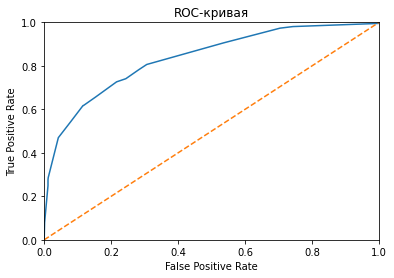

In [19]:
model_best_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
model_best_tree.fit(features_train, target_train)
predictions = model_best_tree.predict(features_valid)
probabilities = model_best_tree.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [20]:
auc_roc = roc_auc_score(target_valid, probabilities_one)
print(auc_roc)

0.8357073437173401


Здесь всё тоже симпатично - но увы, нужное значение F1-меры мы либо не выжимаем, либо выжимаем едва-едва и полнота не радует. Вся надежда - на случайный лес.

### <center>Случайный лес</center>

Посмотрим, что получится при взвешивании классов:`

In [21]:
best_f1 = 0
best_depth = 0
best_num = 0
best_recall = 0
best_precision = 0
for est in range(10, 25):
    for depth in range (3, 13):
        model_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions = model_forest.predict(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions)
        recall = recall_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        f1_sc = f1_score(target_valid, predictions)
        print(f'Количество = {est}, глубина = {depth}:')
        print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
        
        if f1_sc > best_f1:
            best_f1 = f1_sc
            best_depth = depth
            best_num = est
            best_recall = recall
            best_precision = precision
            
print()
print(f'Лучший результат: количество - {best_num}, глубина - {best_depth}, F1-мера - {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность - {best_precision: .4f}')

Количество = 10, глубина = 3:
accuracy -  0.7345, полнота -  0.7700, точность -  0.4218, F1-мера -  0.5450
Количество = 10, глубина = 4:
accuracy -  0.7815, полнота -  0.7385, точность -  0.4811, F1-мера -  0.5826
Количество = 10, глубина = 5:
accuracy -  0.8020, полнота -  0.7361, точность -  0.5144, F1-мера -  0.6056
Количество = 10, глубина = 6:
accuracy -  0.8200, полнота -  0.7215, точность -  0.5488, F1-мера -  0.6234
Количество = 10, глубина = 7:
accuracy -  0.8110, полнота -  0.7240, точность -  0.5311, F1-мера -  0.6127
Количество = 10, глубина = 8:
accuracy -  0.8175, полнота -  0.7046, точность -  0.5449, F1-мера -  0.6146
Количество = 10, глубина = 9:
accuracy -  0.8295, полнота -  0.6683, точность -  0.5750, F1-мера -  0.6181
Количество = 10, глубина = 10:
accuracy -  0.8390, полнота -  0.6562, точность -  0.6009, F1-мера -  0.6273
Количество = 10, глубина = 11:
accuracy -  0.8460, полнота -  0.6126, точность -  0.6309, F1-мера -  0.6216
Количество = 10, глубина = 12:
accu

Количество = 17, глубина = 10:
accuracy -  0.8365, полнота -  0.6368, точность -  0.5977, F1-мера -  0.6166
Количество = 17, глубина = 11:
accuracy -  0.8470, полнота -  0.6102, точность -  0.6348, F1-мера -  0.6222
Количество = 17, глубина = 12:
accuracy -  0.8570, полнота -  0.5763, точность -  0.6819, F1-мера -  0.6247
Количество = 18, глубина = 3:
accuracy -  0.7670, полнота -  0.7458, точность -  0.4604, F1-мера -  0.5693
Количество = 18, глубина = 4:
accuracy -  0.7935, полнота -  0.7240, точность -  0.5000, F1-мера -  0.5915
Количество = 18, глубина = 5:
accuracy -  0.8005, полнота -  0.7312, точность -  0.5119, F1-мера -  0.6022
Количество = 18, глубина = 6:
accuracy -  0.8215, полнота -  0.7191, точность -  0.5520, F1-мера -  0.6246
Количество = 18, глубина = 7:
accuracy -  0.8170, полнота -  0.7094, точность -  0.5436, F1-мера -  0.6155
Количество = 18, глубина = 8:
accuracy -  0.8235, полнота -  0.6949, точность -  0.5584, F1-мера -  0.6192
Количество = 18, глубина = 9:
accu

F1-мера прям очень радует, конечно... в отличие от полноты. Попробуем сделать следующее: возьмём F1-меру с запасом (0.61+) - и попробуем найти максимальную полноту:

In [22]:
best_f1 = 0
best_depth = 0
best_num = 0
best_recall = 0
best_precision = 0
for est in range(10, 31):
    for depth in range (3, 13):
        model_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions = model_forest.predict(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions)
        recall = recall_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        f1_sc = f1_score(target_valid, predictions)
        print(f'Количество = {est}, глубина = {depth}:')
        print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
        
        if f1_sc > 0.61 and recall > best_recall:
            best_f1 = f1_sc
            best_depth = depth
            best_num = est
            best_recall = recall
            best_precision = precision
            
print()
print(f'Лучший результат: количество - {best_num}, глубина - {best_depth}, F1-мера - {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность - {best_precision: .4f}')

Количество = 10, глубина = 3:
accuracy -  0.7345, полнота -  0.7700, точность -  0.4218, F1-мера -  0.5450
Количество = 10, глубина = 4:
accuracy -  0.7815, полнота -  0.7385, точность -  0.4811, F1-мера -  0.5826
Количество = 10, глубина = 5:
accuracy -  0.8020, полнота -  0.7361, точность -  0.5144, F1-мера -  0.6056
Количество = 10, глубина = 6:
accuracy -  0.8200, полнота -  0.7215, точность -  0.5488, F1-мера -  0.6234
Количество = 10, глубина = 7:
accuracy -  0.8110, полнота -  0.7240, точность -  0.5311, F1-мера -  0.6127
Количество = 10, глубина = 8:
accuracy -  0.8175, полнота -  0.7046, точность -  0.5449, F1-мера -  0.6146
Количество = 10, глубина = 9:
accuracy -  0.8295, полнота -  0.6683, точность -  0.5750, F1-мера -  0.6181
Количество = 10, глубина = 10:
accuracy -  0.8390, полнота -  0.6562, точность -  0.6009, F1-мера -  0.6273
Количество = 10, глубина = 11:
accuracy -  0.8460, полнота -  0.6126, точность -  0.6309, F1-мера -  0.6216
Количество = 10, глубина = 12:
accu

Количество = 17, глубина = 12:
accuracy -  0.8570, полнота -  0.5763, точность -  0.6819, F1-мера -  0.6247
Количество = 18, глубина = 3:
accuracy -  0.7670, полнота -  0.7458, точность -  0.4604, F1-мера -  0.5693
Количество = 18, глубина = 4:
accuracy -  0.7935, полнота -  0.7240, точность -  0.5000, F1-мера -  0.5915
Количество = 18, глубина = 5:
accuracy -  0.8005, полнота -  0.7312, точность -  0.5119, F1-мера -  0.6022
Количество = 18, глубина = 6:
accuracy -  0.8215, полнота -  0.7191, точность -  0.5520, F1-мера -  0.6246
Количество = 18, глубина = 7:
accuracy -  0.8170, полнота -  0.7094, точность -  0.5436, F1-мера -  0.6155
Количество = 18, глубина = 8:
accuracy -  0.8235, полнота -  0.6949, точность -  0.5584, F1-мера -  0.6192
Количество = 18, глубина = 9:
accuracy -  0.8240, полнота -  0.6465, точность -  0.5645, F1-мера -  0.6027
Количество = 18, глубина = 10:
accuracy -  0.8415, полнота -  0.6441, точность -  0.6101, F1-мера -  0.6266
Количество = 18, глубина = 11:
accu

Количество = 25, глубина = 9:
accuracy -  0.8295, полнота -  0.6562, точность -  0.5766, F1-мера -  0.6138
Количество = 25, глубина = 10:
accuracy -  0.8370, полнота -  0.6465, точность -  0.5973, F1-мера -  0.6209
Количество = 25, глубина = 11:
accuracy -  0.8425, полнота -  0.6029, точность -  0.6225, F1-мера -  0.6125
Количество = 25, глубина = 12:
accuracy -  0.8595, полнота -  0.5811, точность -  0.6897, F1-мера -  0.6307
Количество = 26, глубина = 3:
accuracy -  0.7785, полнота -  0.7385, точность -  0.4766, F1-мера -  0.5793
Количество = 26, глубина = 4:
accuracy -  0.8045, полнота -  0.7240, точность -  0.5191, F1-мера -  0.6047
Количество = 26, глубина = 5:
accuracy -  0.8015, полнота -  0.7385, точность -  0.5135, F1-мера -  0.6058
Количество = 26, глубина = 6:
accuracy -  0.8185, полнота -  0.7215, точность -  0.5458, F1-мера -  0.6215
Количество = 26, глубина = 7:
accuracy -  0.8185, полнота -  0.7094, точность -  0.5466, F1-мера -  0.6175
Количество = 26, глубина = 8:
accu

Вот этот результат при меньшей F1-мере импонирует мне больше: полнота почти 0.75, точность выше половины. Попробуем поменять порог, оставив взвешивание классов:

In [23]:
model_best_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=27, max_depth=5)
model_best_forest.fit(features_train, target_train)
predictions = model_best_forest.predict(features_valid)
probabilities = model_best_forest.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.9, 0.02):
    predicted_valid = probabilities_one > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1_sc = f1_score(target_valid, predicted_valid)

    print(f'Порог = {threshold: .2f}:')
    print(f'полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        
print()
print(f'Лучший результат: порог - {best_threshold}, F1-мера: {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность: {best_precision: .4f}')

Порог =  0.10:
полнота -  1.0000, точность -  0.2065, F1-мера -  0.3423
Порог =  0.12:
полнота -  1.0000, точность -  0.2066, F1-мера -  0.3425
Порог =  0.14:
полнота -  1.0000, точность -  0.2067, F1-мера -  0.3426
Порог =  0.16:
полнота -  1.0000, точность -  0.2104, F1-мера -  0.3476
Порог =  0.18:
полнота -  0.9976, точность -  0.2193, F1-мера -  0.3595
Порог =  0.20:
полнота -  0.9927, точность -  0.2284, F1-мера -  0.3714
Порог =  0.22:
полнота -  0.9927, точность -  0.2403, F1-мера -  0.3870
Порог =  0.24:
полнота -  0.9879, точность -  0.2503, F1-мера -  0.3994
Порог =  0.26:
полнота -  0.9782, точность -  0.2630, F1-мера -  0.4146
Порог =  0.28:
полнота -  0.9734, точность -  0.2771, F1-мера -  0.4313
Порог =  0.30:
полнота -  0.9540, точность -  0.2895, F1-мера -  0.4442
Порог =  0.32:
полнота -  0.9419, точность -  0.3018, F1-мера -  0.4571
Порог =  0.34:
полнота -  0.9249, точность -  0.3186, F1-мера -  0.4739
Порог =  0.36:
полнота -  0.9007, точность -  0.3416, F1-мера - 

Да, лучшие варианты в разрезе F1-меры есть - но теряем в полноте. Здесь мне ничто не импонирует - попробуем посмотреть, что будет, если менять порог без взвешивания классов:

In [24]:
model_best_forest = RandomForestClassifier(random_state=42, n_estimators=27, max_depth=5)
model_best_forest.fit(features_train, target_train)
predictions = model_best_forest.predict(features_valid)
probabilities = model_best_forest.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

best_f1 = 0
best_recall = 0
best_precision = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.9, 0.02):
    predicted_valid = probabilities_one > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1_sc = f1_score(target_valid, predicted_valid)

    print(f'Порог = {threshold: .2f}:')
    print(f'полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
        
print()
print(f'Лучший результат: порог - {best_threshold}, F1-мера: {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность: {best_precision: .4f}')

Порог =  0.10:
полнота -  0.9806, точность -  0.2603, F1-мера -  0.4114
Порог =  0.12:
полнота -  0.9540, точность -  0.3035, F1-мера -  0.4605
Порог =  0.14:
полнота -  0.9177, точность -  0.3248, F1-мера -  0.4797
Порог =  0.16:
полнота -  0.8741, точность -  0.3691, F1-мера -  0.5191
Порог =  0.18:
полнота -  0.7942, точность -  0.4310, F1-мера -  0.5588
Порог =  0.20:
полнота -  0.7579, точность -  0.4700, F1-мера -  0.5802
Порог =  0.22:
полнота -  0.7240, точность -  0.5059, F1-мера -  0.5956
Порог =  0.24:
полнота -  0.6852, точность -  0.5442, F1-мера -  0.6066
Порог =  0.26:
полнота -  0.6223, точность -  0.5963, F1-мера -  0.6090
Порог =  0.28:
полнота -  0.5811, точность -  0.6332, F1-мера -  0.6061
Порог =  0.30:
полнота -  0.5569, точность -  0.6785, F1-мера -  0.6117
Порог =  0.32:
полнота -  0.5303, точность -  0.7134, F1-мера -  0.6083
Порог =  0.34:
полнота -  0.5133, точность -  0.7285, F1-мера -  0.6023
Порог =  0.36:
полнота -  0.4915, точность -  0.7463, F1-мера - 

Здесь тоже не видно лучшего варианта, чем исходный - лучшего баланса полноты/точности/F1-меры с упором на полноту. Итого остановимся на модели `количество - 27, глубина - 5, взвешивание классов, порог по умолчанию 0.5`. Глянем на ROC-кривую:

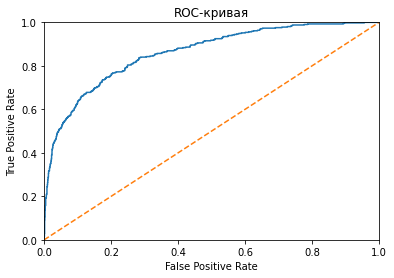

In [25]:
model_best_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=27, max_depth=5)
model_best_forest.fit(features_train, target_train)
predictions = model_best_forest.predict(features_valid)
probabilities = model_best_forest.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [26]:
auc_roc = roc_auc_score(target_valid, probabilities_one)
print(auc_roc)

0.8607580355521787


Красота! Посмотрим, пройдёт ли модель проверку на тестовой выборке.

## <center>Проверка на тестовой выборке</center>

Настал момент истины :) Обучим модель на сложенной обучающей + валидационной выборке - и посмотрим, что выйдет на тестовой:

In [27]:
features_train_new = pd.concat([features_train] + [features_valid])
target_train_new = pd.concat([target_train] + [target_valid])
model_best_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=27, max_depth=5)
model_best_forest.fit(features_train_new, target_train_new)
predictions = model_best_forest.predict(features_test)
        
accuracy = accuracy_score(target_test, predictions)
recall = recall_score(target_test, predictions)
precision = precision_score(target_test, predictions)
f1_sc = f1_score(target_test, predictions)
print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')

accuracy -  0.7900, полнота -  0.7735, точность -  0.4787, F1-мера -  0.5914


И-и-и... почти. Но нет. Что ж - повторяем заново поиск модели с хорошей полнотой, но теперь F1-меру возьмём не 0.61+, а 0.62+.

In [28]:
best_f1 = 0
best_depth = 0
best_num = 0
best_recall = 0
best_precision = 0
for est in range(10, 31):
    for depth in range (3, 13):
        model_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions = model_forest.predict(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions)
        recall = recall_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        f1_sc = f1_score(target_valid, predictions)
        print(f'Количество = {est}, глубина = {depth}:')
        print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')
        
        if f1_sc > 0.62 and recall > best_recall:
            best_f1 = f1_sc
            best_depth = depth
            best_num = est
            best_recall = recall
            best_precision = precision
            
print()
print(f'Лучший результат: количество - {best_num}, глубина - {best_depth}, F1-мера - {best_f1: .4f}')
print(f'полнота - {best_recall: .4f}, точность - {best_precision: .4f}')

Количество = 10, глубина = 3:
accuracy -  0.7345, полнота -  0.7700, точность -  0.4218, F1-мера -  0.5450
Количество = 10, глубина = 4:
accuracy -  0.7815, полнота -  0.7385, точность -  0.4811, F1-мера -  0.5826
Количество = 10, глубина = 5:
accuracy -  0.8020, полнота -  0.7361, точность -  0.5144, F1-мера -  0.6056
Количество = 10, глубина = 6:
accuracy -  0.8200, полнота -  0.7215, точность -  0.5488, F1-мера -  0.6234
Количество = 10, глубина = 7:
accuracy -  0.8110, полнота -  0.7240, точность -  0.5311, F1-мера -  0.6127
Количество = 10, глубина = 8:
accuracy -  0.8175, полнота -  0.7046, точность -  0.5449, F1-мера -  0.6146
Количество = 10, глубина = 9:
accuracy -  0.8295, полнота -  0.6683, точность -  0.5750, F1-мера -  0.6181
Количество = 10, глубина = 10:
accuracy -  0.8390, полнота -  0.6562, точность -  0.6009, F1-мера -  0.6273
Количество = 10, глубина = 11:
accuracy -  0.8460, полнота -  0.6126, точность -  0.6309, F1-мера -  0.6216
Количество = 10, глубина = 12:
accu

Количество = 17, глубина = 10:
accuracy -  0.8365, полнота -  0.6368, точность -  0.5977, F1-мера -  0.6166
Количество = 17, глубина = 11:
accuracy -  0.8470, полнота -  0.6102, точность -  0.6348, F1-мера -  0.6222
Количество = 17, глубина = 12:
accuracy -  0.8570, полнота -  0.5763, точность -  0.6819, F1-мера -  0.6247
Количество = 18, глубина = 3:
accuracy -  0.7670, полнота -  0.7458, точность -  0.4604, F1-мера -  0.5693
Количество = 18, глубина = 4:
accuracy -  0.7935, полнота -  0.7240, точность -  0.5000, F1-мера -  0.5915
Количество = 18, глубина = 5:
accuracy -  0.8005, полнота -  0.7312, точность -  0.5119, F1-мера -  0.6022
Количество = 18, глубина = 6:
accuracy -  0.8215, полнота -  0.7191, точность -  0.5520, F1-мера -  0.6246
Количество = 18, глубина = 7:
accuracy -  0.8170, полнота -  0.7094, точность -  0.5436, F1-мера -  0.6155
Количество = 18, глубина = 8:
accuracy -  0.8235, полнота -  0.6949, точность -  0.5584, F1-мера -  0.6192
Количество = 18, глубина = 9:
accu

Количество = 25, глубина = 7:
accuracy -  0.8155, полнота -  0.7143, точность -  0.5403, F1-мера -  0.6152
Количество = 25, глубина = 8:
accuracy -  0.8270, полнота -  0.7094, точность -  0.5645, F1-мера -  0.6288
Количество = 25, глубина = 9:
accuracy -  0.8295, полнота -  0.6562, точность -  0.5766, F1-мера -  0.6138
Количество = 25, глубина = 10:
accuracy -  0.8370, полнота -  0.6465, точность -  0.5973, F1-мера -  0.6209
Количество = 25, глубина = 11:
accuracy -  0.8425, полнота -  0.6029, точность -  0.6225, F1-мера -  0.6125
Количество = 25, глубина = 12:
accuracy -  0.8595, полнота -  0.5811, точность -  0.6897, F1-мера -  0.6307
Количество = 26, глубина = 3:
accuracy -  0.7785, полнота -  0.7385, точность -  0.4766, F1-мера -  0.5793
Количество = 26, глубина = 4:
accuracy -  0.8045, полнота -  0.7240, точность -  0.5191, F1-мера -  0.6047
Количество = 26, глубина = 5:
accuracy -  0.8015, полнота -  0.7385, точность -  0.5135, F1-мера -  0.6058
Количество = 26, глубина = 6:
accu

Всего лишь увеличить глубину на 1? Что ж - попробуем:

In [29]:
model_best_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=27, max_depth=6)
model_best_forest.fit(features_train_new, target_train_new)
predictions = model_best_forest.predict(features_test)
        
accuracy = accuracy_score(target_test, predictions)
recall = recall_score(target_test, predictions)
precision = precision_score(target_test, predictions)
f1_sc = f1_score(target_test, predictions)
print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')

accuracy -  0.8140, полнота -  0.7659, точность -  0.5181, F1-мера -  0.6181


А вот теперь - да, победа разума! 0.75 полнота, 0.5+ точность, F1-мера - 0.62. По-моему, это хороший результат.

Глянем AUC:

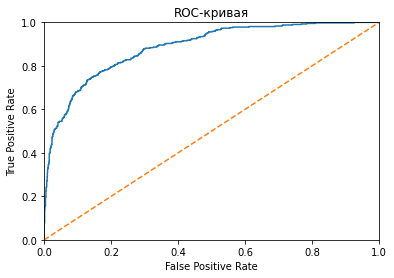

In [30]:
probabilities = model_best_forest.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [31]:
auc_roc = roc_auc_score(target_valid, probabilities_one)
print(auc_roc)

0.8858789102132795


Красота!

Ради любопытства посмотрим, а что показывает модель с бОльшей F1-мерой, но меньшей полнотой (по этой причине мы её и отложили):

In [32]:
model_best_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=17, max_depth=11)
model_best_forest.fit(features_train_new, target_train_new)
predictions = model_best_forest.predict(features_test)
        
accuracy = accuracy_score(target_test, predictions)
recall = recall_score(target_test, predictions)
precision = precision_score(target_test, predictions)
f1_sc = f1_score(target_test, predictions)
print(f'accuracy - {accuracy: .4f}, полнота - {recall: .4f}, точность - {precision: .4f}, F1-мера - {f1_sc: .4f}')

accuracy -  0.8390, полнота -  0.6260, точность -  0.5843, F1-мера -  0.6044


И хорошо, что отложили - она провисает по всем важным показателям.

Итого лучший вариант - это **случайный лес с количеством деревьев 27 и глубиной 6**:

<br>`F1-мера ~0.62`
<br>`Полнота ~0.75, точность ~0.53`

## <center>Важность факторов<center>

Посмотрим, какие факторы являются самыми значимыми:

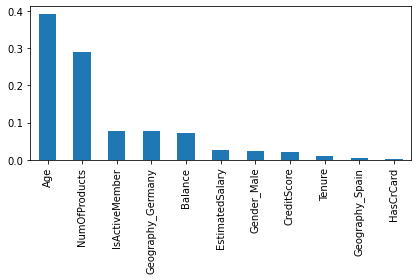

In [33]:
model_best_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=27, max_depth=6)
model_best_forest.fit(features_train_new, target_train_new)

importances = model_best_forest.feature_importances_
forest_importances = pd.Series(importances, index=features_train_new.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()

Победа возраста любопытна и, признаться, неожиданна. Количество продуктов вполне ожидаемо, но удивляет, что основным фактором является возраст - возможно, здесь стоит провести исследование.